Link groundtruth.csv : https://drive.google.com/file/d/1L4GMcXJNweEEiSIt5Ws-FdO8XPStoloX/view?usp=sharing



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#metadata
dt = pd.read_csv('/content/drive/MyDrive/minidata/ISIC_2020_Test_Metadata.csv')
dt

,image,patient,age_approx,anatom_site_general,sex
0,ISIC_0052060,IP_3579794,70,NaN,male
1,ISIC_0052349,IP_7782715,40,lower extremity,male
2,ISIC_0058510,IP_7960270,55,torso,female
3,ISIC_0073313,IP_6375035,50,torso,female
4,ISIC_0073502,IP_0589375,45,lower extremity,female
...,...,...,...,...,...
10977,ISIC_9992485,IP_4152479,40,torso,male
10978,ISIC_9996992,IP_4890115,35,torso,male
10979,ISIC_9997917,IP_2852390,25,upper extremity,male
10980,ISIC_9998234,IP_8861963,65,lower extremity,male


In [ ]:
#groundtruth
df = pd.read_csv('/content/drive/MyDrive/minidata/ISIC_2020_Training_GroundTruth.csv')
df

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33061 non-null  object 
 3   age_approx                     33058 non-null  float64
 4   anatom_site_general_challenge  32599 non-null  object 
 5   diagnosis                      33126 non-null  object 
 6   benign_malignant               33126 non-null  object 
 7   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(6)
memory usage: 2.0+ MB


In [ ]:
df.nunique()

image_name                       33126
patient_id                        2056
sex                                  2
age_approx                          18
anatom_site_general_challenge        6
diagnosis                            9
benign_malignant                     2
target                               2
dtype: int64

In [ ]:
df.isna().sum()

image_name                         0
patient_id                         0
sex                               65
age_approx                        68
anatom_site_general_challenge    527
diagnosis                          0
benign_malignant                   0
target                             0
dtype: int64

In [ ]:
df['diagnosis'].value_counts()

unknown                               27124
nevus                                  5193
melanoma                                584
seborrheic keratosis                    135
lentigo NOS                              44
lichenoid keratosis                      37
solar lentigo                             7
cafe-au-lait macule                       1
atypical melanocytic proliferation        1
Name: diagnosis, dtype: int64

In [ ]:
#df['sex'].fillna('unknown' , inplace = True )
#df['age_approx'].fillna('unknown' , inplace = True )
#df['anatom_site_general_challenge'].fillna('unknown' , inplace = True )
#f.isna().sum()

#MALIGNANT

Melanoma = Malignant = 1 = Kanker
Data frame berisi gambar yang terdiagnosis kankernya aja, ada 584 data

In [ ]:
df_malignant = df[df['target'] == 1]
df_malignant

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
91,ISIC_0149568,IP_0962375,female,55.0,upper extremity,melanoma,malignant,1
235,ISIC_0188432,IP_0135517,female,50.0,upper extremity,melanoma,malignant,1
314,ISIC_0207268,IP_7735373,male,55.0,torso,melanoma,malignant,1
399,ISIC_0232101,IP_8349964,male,65.0,torso,melanoma,malignant,1
459,ISIC_0247330,IP_3232631,female,65.0,lower extremity,melanoma,malignant,1
...,...,...,...,...,...,...,...,...
32969,ISIC_9955163,IP_7507212,male,55.0,upper extremity,melanoma,malignant,1
33000,ISIC_9963177,IP_1165806,male,70.0,torso,melanoma,malignant,1
33014,ISIC_9967383,IP_7887363,male,60.0,upper extremity,melanoma,malignant,1
33050,ISIC_9978107,IP_2860540,male,65.0,lower extremity,melanoma,malignant,1


In [ ]:
df_malignant.to_csv('malignant.csv')

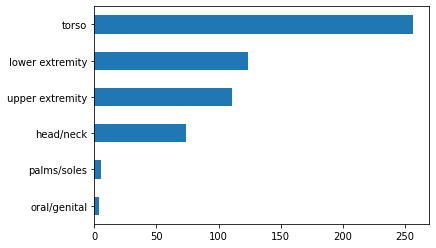

In [ ]:
df_malignant.anatom_site_general_challenge.value_counts(ascending = True).plot(kind = 'barh');

In [ ]:
df_malignant.anatom_site_general_challenge.value_counts()

torso              257
lower extremity    124
upper extremity    111
head/neck           74
palms/soles          5
oral/genital         4
Name: anatom_site_general_challenge, dtype: int64

Dari bar chart tersebut, mayoritas penderita melanoma malignant paling banyak tersebar di bagian tubuh daerah torso dengan jumlah 257 pasien dari total 584 pasien yang artinya sekitar 44% dari kesuluruhan.

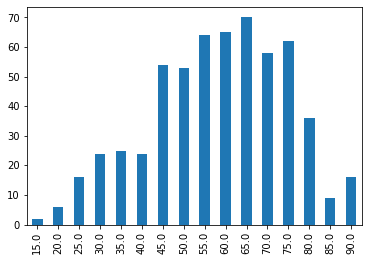

In [ ]:
df_malignant['age_approx'].value_counts().sort_index().plot(kind = 'bar');


In [ ]:
df_malignant.age_approx.value_counts().sort_index()

15.0     2
20.0     6
25.0    16
30.0    24
35.0    25
40.0    24
45.0    54
50.0    53
55.0    64
60.0    65
65.0    70
70.0    58
75.0    62
80.0    36
85.0     9
90.0    16
Name: age_approx, dtype: int64

Penderita melanoma malignant berada dalam rentang 15-65 tahun, dari diagram diatas diambil kesimpulan bahwa pasien yang rentan menderita melanoma malignant adalah pasien yang berusia >50 tahun





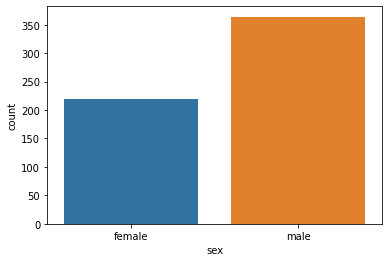

In [ ]:
sns.countplot(data = df_malignant , x = 'sex');

In [ ]:
df_malignant.sex.value_counts()

male      364
female    220
Name: sex, dtype: int64

Dari data ISIC Melanoma 2020 penderita terbanyak berjenis kelamin laki laki dengan jumlah sebanyak 364 pasien

#BENIGN

Benign = 0 = Bukan Kanker

Tapi masih berisi data dengan diagnosis 'unknown'

In [ ]:
df_benign = df[df['target'] == 0]
df_benign

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
...,...,...,...,...,...,...,...,...
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0
33124,ISIC_9999666,IP_7702038,male,50.0,lower extremity,unknown,benign,0


In [ ]:
#unknown nya di exclude jadi sisa 5418 data
df_benign_wo_unknown = df_benign[df_benign['diagnosis'] != 'unknown']
df_benign_wo_unknown

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
12,ISIC_0076995,IP_2235340,female,55.0,torso,nevus,benign,0
26,ISIC_0084086,IP_4023055,male,60.0,lower extremity,nevus,benign,0
27,ISIC_0084270,IP_2961528,male,40.0,lower extremity,nevus,benign,0
28,ISIC_0084395,IP_0175539,female,45.0,torso,nevus,benign,0
...,...,...,...,...,...,...,...,...
33099,ISIC_9991967,IP_2507276,male,70.0,lower extremity,nevus,benign,0
33108,ISIC_9995691,IP_2358028,male,50.0,upper extremity,nevus,benign,0
33113,ISIC_9997614,IP_1705144,female,50.0,upper extremity,nevus,benign,0
33118,ISIC_9998937,IP_3091321,male,40.0,head/neck,nevus,benign,0


In [ ]:
df_benign_wo_unknown.to_csv('benign_wo_unknown.csv')

In [ ]:
# data unknown nya aja ada +- 27rb data
df_benign_unknown = df_benign[df_benign['diagnosis'] == 'unknown']
df_benign_unknown

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0
5,ISIC_0074311,IP_2950485,female,40.0,lower extremity,unknown,benign,0
...,...,...,...,...,...,...,...,...
33120,ISIC_9999127,IP_9583707,male,20.0,torso,unknown,benign,0
33121,ISIC_9999134,IP_6526534,male,50.0,torso,unknown,benign,0
33122,ISIC_9999320,IP_3650745,male,65.0,torso,unknown,benign,0
33123,ISIC_9999515,IP_2026598,male,20.0,lower extremity,unknown,benign,0


#DF WITHOUT UNKNOWN

Data frame yang berisi diagnosis

*   melanoma (kanker) = 584
*   nevus (non-kanker)
*   lentigo NOS (non-kanker)
*   solar lentigo (non-kanker)
*   seboroik (non-kanker)
*   atypical melanocytic (non-kanker)
*   cefa-au-lait (non-kanker)
*   lichenoid









In [ ]:
df_wo_unknown = df[df['diagnosis'] != 'unknown']
df_wo_unknown

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
12,ISIC_0076995,IP_2235340,female,55.0,torso,nevus,benign,0
26,ISIC_0084086,IP_4023055,male,60.0,lower extremity,nevus,benign,0
27,ISIC_0084270,IP_2961528,male,40.0,lower extremity,nevus,benign,0
28,ISIC_0084395,IP_0175539,female,45.0,torso,nevus,benign,0
...,...,...,...,...,...,...,...,...
33108,ISIC_9995691,IP_2358028,male,50.0,upper extremity,nevus,benign,0
33113,ISIC_9997614,IP_1705144,female,50.0,upper extremity,nevus,benign,0
33117,ISIC_9998682,IP_2516168,male,60.0,head/neck,melanoma,malignant,1
33118,ISIC_9998937,IP_3091321,male,40.0,head/neck,nevus,benign,0


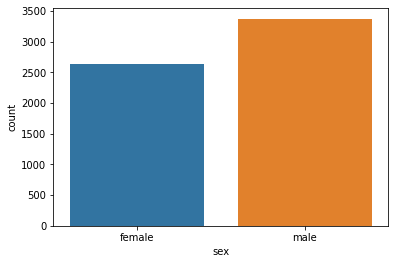

In [ ]:
sns.countplot(data = df_wo_unknown , x = 'sex');

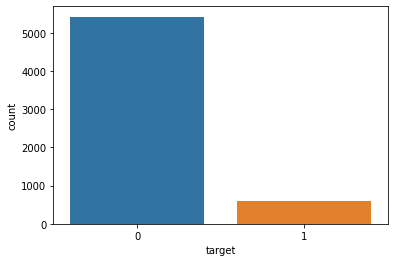

In [ ]:
sns.countplot(data = df_wo_unknown , x = 'target');

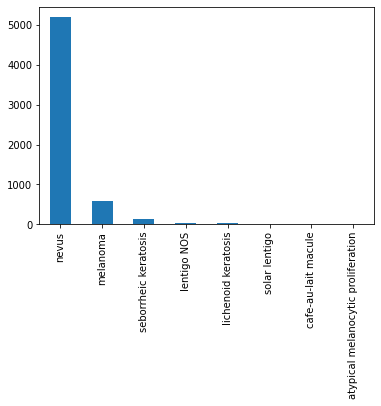

In [ ]:
df_wo_unknown.diagnosis.value_counts(ascending = False).plot(kind = 'bar');

In [ ]:
df_wo_unknown.diagnosis.value_counts()

nevus                                 5193
melanoma                               584
seborrheic keratosis                   135
lentigo NOS                             44
lichenoid keratosis                     37
solar lentigo                            7
cafe-au-lait macule                      1
atypical melanocytic proliferation       1
Name: diagnosis, dtype: int64

Penderita penyakit kulit terbanyak terdiagnosis sebagai penyakit nevus yaitu sekitar 86% dari total keseluruhan pasien

# DF nevus_unknown

In [ ]:
train = df_benign[df_benign['diagnosis'] != 'atypical melanocytic proliferation']
train = train[train['diagnosis'] != 'cafe-au-lait macule']
train = train[train['diagnosis'] != 'lichenoid keratosis']
train = train[train['diagnosis'] != 'seborrheic keratosis']
train = train[train['diagnosis'] != 'solar lentigo']
train = train[train['diagnosis'] != 'lentigo NOS']
train['diagnosis'].value_counts()

unknown    27124
nevus       5193
Name: diagnosis, dtype: int64

#Undersampling

In [ ]:
under = df[df['diagnosis'] != 'unknown']
under = under[under['diagnosis'] != 'solar lentigo']
under = under[under['diagnosis'] != 'cafe-au-lait macule']
under = under[under['diagnosis'] != 'atypical melanocytic proliferation']
under['diagnosis'].value_counts()

nevus                   5193
melanoma                 584
seborrheic keratosis     135
lentigo NOS               44
lichenoid keratosis       37
Name: diagnosis, dtype: int64

In [ ]:
under

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
12,ISIC_0076995,IP_2235340,female,55.0,torso,nevus,benign,0
26,ISIC_0084086,IP_4023055,male,60.0,lower extremity,nevus,benign,0
27,ISIC_0084270,IP_2961528,male,40.0,lower extremity,nevus,benign,0
28,ISIC_0084395,IP_0175539,female,45.0,torso,nevus,benign,0
...,...,...,...,...,...,...,...,...
33108,ISIC_9995691,IP_2358028,male,50.0,upper extremity,nevus,benign,0
33113,ISIC_9997614,IP_1705144,female,50.0,upper extremity,nevus,benign,0
33117,ISIC_9998682,IP_2516168,male,60.0,head/neck,melanoma,malignant,1
33118,ISIC_9998937,IP_3091321,male,40.0,head/neck,nevus,benign,0


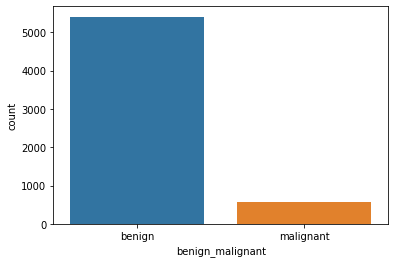

In [ ]:
sns.countplot(data = under , x = 'benign_malignant');

In [ ]:
under.to_csv('undersampling.csv')

#Modelling

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from pathlib import Path
from collections import Counter

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img

seed = 382938
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
!pip install unrar
!unrar x bycott_rev.rar

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal

Cannot open bycott_rev.rar
No such file or directory
No files to extract


Number of images found :  526
Shape of image:  (2448, 3264, 3)
Shape of image:  (2448, 3264, 3)
Shape of image:  (1053, 1872, 3)
Shape of image:  (2448, 3264, 3)


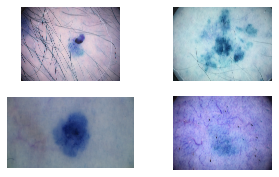

In [ ]:
data_dir = Path("/content/drive/MyDrive/minidata/undersampling/train/malignant")
images = list(data_dir.glob("*.jpg"))
print("Number of images found : ", len(images))
# Let's take a look at some samples first.
# Always look at your data!
sample_images = images[:4]

_,ax = plt.subplots(2,2, figsize=(5,3))
for i in range(4):
    img = cv2.imread(str(sample_images[i]))
    print("Shape of image: ", img.shape)
    ax[i//2, i%2].imshow(img)
    ax[i//2, i%2].axis('off')
plt.show()

In [ ]:
def compute_perf_metric(predictions, groundtruth):
    if predictions.shape == groundtruth.shape:
        return np.sum(predictions == groundtruth)/(predictions.shape[0]*predictions.shape[1])
    else:
        raise Exception('Error : the size of the arrays do not match. Cannot compute the performance metric')

In [ ]:
dataset = []
labels = []
images = sorted(list(map(str, list(data_dir.glob("*.jpg")))))
for img in images:
  names = img.split(os.path.sep)[-1].split(".jpg")[0]
  labels.append(names[1:])
  dataset.append((str(img), names[1:]))
dataset = pd.DataFrame(dataset, columns=["data_dir", "labels"], index=None)
dataset = dataset.sample(frac=1.0).reset_index(drop=True)
characters = set(char for label in labels for char in label)
max_length = max([len(label) for label in labels])

print("Number of images found: ", len(images))
print("Number of labels found: ", len(labels))
print("Number of unique characters: ", len(characters))
print("Characters present: ", sorted(characters))
print('Maximum length of barcode: ', max_length)
dataset

Number of images found:  526
Number of labels found:  526
Number of unique characters:  14
Characters present:  ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'C', 'I', 'S', '_']
Maximum length of barcode:  11


,data_dir,labels
0,/content/drive/MyDrive/minidata/undersampling/...,SIC_3301933
1,/content/drive/MyDrive/minidata/undersampling/...,SIC_3446357
2,/content/drive/MyDrive/minidata/undersampling/...,SIC_7577395
3,/content/drive/MyDrive/minidata/undersampling/...,SIC_9785077
4,/content/drive/MyDrive/minidata/undersampling/...,SIC_8892236
...,...,...
521,/content/drive/MyDrive/minidata/undersampling/...,SIC_3399306
522,/content/drive/MyDrive/minidata/undersampling/...,SIC_6931277
523,/content/drive/MyDrive/minidata/undersampling/...,SIC_9828846
524,/content/drive/MyDrive/minidata/undersampling/...,SIC_5732201


In [ ]:
#Gimana caranya labels berubah pake folder name instead file name
#Bisa pake Image data generator tapi gabisa attach ke file csv
# model 1 lagi eror karna filename harus bisa diindeks
